In [48]:
import geopandas as gpd
import pandas as pd
import censusdata
from tabulate import tabulate
from matplotlib import pyplot as plt
import folium
import contextily as cx

In [81]:
tractshape=gpd.read_file('acs2020_5yr_B17001_14000US22071008800/acs2020_5yr_B17001_14000US22071008800.geojson')

In [82]:
totalpop=gpd.read_file('acs2020_5yr_B01003_14000US22071008800/acs2020_5yr_B01003_14000US22071008800.geojson')

<AxesSubplot:>

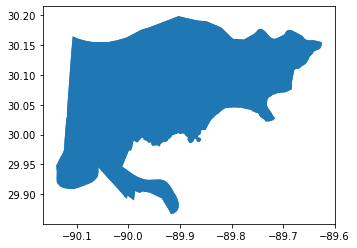

In [83]:
tractshape.plot()

In [84]:
tractshape.head()

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
0,14000US22071000100,"Census Tract 1, Orleans, LA",2591.0,466.0,166.0,158.0,74.0,76.0,8.0,14.0,...,95.0,152.0,42.0,194.0,87.0,184.0,122.0,128.0,164.0,"MULTIPOLYGON (((-90.05867 29.95390, -90.05697 ..."
1,14000US22071000200,"Census Tract 2, Orleans, LA",918.0,216.0,155.0,91.0,70.0,54.0,0.0,14.0,...,35.0,25.0,21.0,93.0,62.0,53.0,21.0,14.0,16.0,"MULTIPOLYGON (((-90.05857 29.94764, -90.05829 ..."
2,14000US22071000300,"Census Tract 3, Orleans, LA",1220.0,292.0,230.0,144.0,130.0,84.0,18.0,29.0,...,89.0,46.0,29.0,109.0,69.0,26.0,21.0,24.0,21.0,"MULTIPOLYGON (((-90.05406 29.94097, -90.05368 ..."
3,14000US22071000400,"Census Tract 4, Orleans, LA",1979.0,437.0,415.0,287.0,187.0,157.0,0.0,14.0,...,62.0,113.0,59.0,110.0,44.0,45.0,29.0,0.0,14.0,"MULTIPOLYGON (((-90.04779 29.93482, -90.04651 ..."
4,14000US22071000601,"Census Tract 6.01, Orleans, LA",886.0,175.0,497.0,78.0,198.0,112.0,0.0,14.0,...,21.0,13.0,22.0,13.0,14.0,54.0,55.0,0.0,14.0,"MULTIPOLYGON (((-90.04397 29.93141, -90.04397 ..."


In [85]:
totalpop.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,14000US22071000100,"Census Tract 1, Orleans, LA",2591.0,466.0,"MULTIPOLYGON (((-90.05867 29.95390, -90.05697 ..."
1,14000US22071000200,"Census Tract 2, Orleans, LA",918.0,216.0,"MULTIPOLYGON (((-90.05857 29.94764, -90.05829 ..."
2,14000US22071000300,"Census Tract 3, Orleans, LA",1220.0,292.0,"MULTIPOLYGON (((-90.05406 29.94097, -90.05368 ..."
3,14000US22071000400,"Census Tract 4, Orleans, LA",1979.0,437.0,"MULTIPOLYGON (((-90.04779 29.93482, -90.04651 ..."
4,14000US22071000601,"Census Tract 6.01, Orleans, LA",886.0,175.0,"MULTIPOLYGON (((-90.04397 29.93141, -90.04397 ..."


In [86]:
povdf = tractshape[['geoid','name','B17001001','B17001002','geometry']]

In [87]:
povdf.head()

,geoid,name,B17001001,B17001002,geometry
0,14000US22071000100,"Census Tract 1, Orleans, LA",2591.0,166.0,"MULTIPOLYGON (((-90.05867 29.95390, -90.05697 ..."
1,14000US22071000200,"Census Tract 2, Orleans, LA",918.0,155.0,"MULTIPOLYGON (((-90.05857 29.94764, -90.05829 ..."
2,14000US22071000300,"Census Tract 3, Orleans, LA",1220.0,230.0,"MULTIPOLYGON (((-90.05406 29.94097, -90.05368 ..."
3,14000US22071000400,"Census Tract 4, Orleans, LA",1979.0,415.0,"MULTIPOLYGON (((-90.04779 29.93482, -90.04651 ..."
4,14000US22071000601,"Census Tract 6.01, Orleans, LA",886.0,497.0,"MULTIPOLYGON (((-90.04397 29.93141, -90.04397 ..."


In [88]:
povdf['prctpov']=(povdf['B17001002']/povdf['B17001001'])*100
povdf['prctpov'] = povdf['prctpov'].fillna(0)

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [89]:
povdf.head()

,geoid,name,B17001001,B17001002,geometry,prctpov
0,14000US22071000100,"Census Tract 1, Orleans, LA",2591.0,166.0,"MULTIPOLYGON (((-90.05867 29.95390, -90.05697 ...",6.406793
1,14000US22071000200,"Census Tract 2, Orleans, LA",918.0,155.0,"MULTIPOLYGON (((-90.05857 29.94764, -90.05829 ...",16.884532
2,14000US22071000300,"Census Tract 3, Orleans, LA",1220.0,230.0,"MULTIPOLYGON (((-90.05406 29.94097, -90.05368 ...",18.852459
3,14000US22071000400,"Census Tract 4, Orleans, LA",1979.0,415.0,"MULTIPOLYGON (((-90.04779 29.93482, -90.04651 ...",20.970187
4,14000US22071000601,"Census Tract 6.01, Orleans, LA",886.0,497.0,"MULTIPOLYGON (((-90.04397 29.93141, -90.04397 ...",56.094808


In [90]:
povdf.astype({'prctpov': 'float'}).dtypes
povdf.astype({'geoid': 'str'}).dtypes
povdf.astype({'name': 'str'}).dtypes

geoid          object
name           object
B17001001     float64
B17001002     float64
geometry     geometry
prctpov       float64
dtype: object

In [91]:
outlines=povdf[['geoid','geometry']]

In [92]:
outlines.head()

,geoid,geometry
0,14000US22071000100,"MULTIPOLYGON (((-90.05867 29.95390, -90.05697 ..."
1,14000US22071000200,"MULTIPOLYGON (((-90.05857 29.94764, -90.05829 ..."
2,14000US22071000300,"MULTIPOLYGON (((-90.05406 29.94097, -90.05368 ..."
3,14000US22071000400,"MULTIPOLYGON (((-90.04779 29.93482, -90.04651 ..."
4,14000US22071000601,"MULTIPOLYGON (((-90.04397 29.93141, -90.04397 ..."


In [93]:
import numpy as np

In [94]:
povdf.prctpov.idxmax()

171

In [95]:
povdf.loc[171, 'name']

'Census Tract 137.02, Orleans, LA'

In [96]:
povdf = povdf.drop(labels=184, axis=0)

In [97]:
m = folium.Map(location=('29.96','-90.10'), zoom_start=11)

In [98]:
m

Text(0.5, 1.0, 'Percentage of people below 50% of poverty')

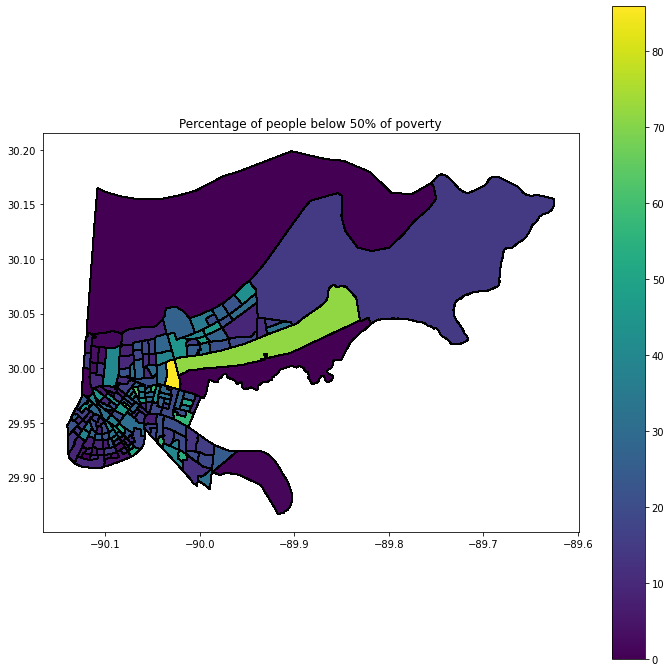

In [99]:
fig, ax = plt.subplots(figsize=(12, 12))

povdf.plot(
     column='prctpov',
     edgecolor='k',
     ax=ax,
     legend=True,
     antialiased=False
    
)
outlines.plot(ax=ax, facecolor='none')
ax.set_title("Percentage of people below 50% of poverty")


<AxesSubplot:>

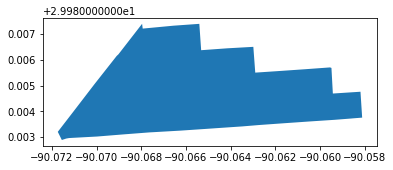

In [100]:
povdf.sample(1).plot()

In [102]:
povdf_proj = povdf.to_crs('epsg:4326')

In [103]:
povdf_proj.head()

,geoid,name,B17001001,B17001002,geometry,prctpov
0,14000US22071000100,"Census Tract 1, Orleans, LA",2591.0,166.0,"MULTIPOLYGON (((-90.05867 29.95390, -90.05697 ...",6.406793
1,14000US22071000200,"Census Tract 2, Orleans, LA",918.0,155.0,"MULTIPOLYGON (((-90.05857 29.94764, -90.05829 ...",16.884532
2,14000US22071000300,"Census Tract 3, Orleans, LA",1220.0,230.0,"MULTIPOLYGON (((-90.05406 29.94097, -90.05368 ...",18.852459
3,14000US22071000400,"Census Tract 4, Orleans, LA",1979.0,415.0,"MULTIPOLYGON (((-90.04779 29.93482, -90.04651 ...",20.970187
4,14000US22071000601,"Census Tract 6.01, Orleans, LA",886.0,497.0,"MULTIPOLYGON (((-90.04397 29.93141, -90.04397 ...",56.094808


In [104]:
from folium import GeoJson

In [105]:
GeoJson(povdf).add_to(m)
m

In [195]:
m = folium.Map(location=('29.96','-90.10'), zoom_start=11)

In [196]:
m

In [197]:
folium.Choropleth(
    geo_data=povdf,
    data=povdf,
    columns=['geoid','prctpov'],   
    legend_name='Percent Poverty',
    key_on='feature.properties.geoid'
    ).add_to(m)
m

In [198]:
tractcent = povdf.copy(deep=True)

In [199]:
df = tractcent
df.head()

,geoid,name,B17001001,B17001002,geometry,prctpov
0,14000US22071000100,"Census Tract 1, Orleans, LA",2591.0,166.0,"MULTIPOLYGON (((-90.05867 29.95390, -90.05697 ...",6.406793
1,14000US22071000200,"Census Tract 2, Orleans, LA",918.0,155.0,"MULTIPOLYGON (((-90.05857 29.94764, -90.05829 ...",16.884532
2,14000US22071000300,"Census Tract 3, Orleans, LA",1220.0,230.0,"MULTIPOLYGON (((-90.05406 29.94097, -90.05368 ...",18.852459
3,14000US22071000400,"Census Tract 4, Orleans, LA",1979.0,415.0,"MULTIPOLYGON (((-90.04779 29.93482, -90.04651 ...",20.970187
4,14000US22071000601,"Census Tract 6.01, Orleans, LA",886.0,497.0,"MULTIPOLYGON (((-90.04397 29.93141, -90.04397 ...",56.094808


In [200]:
temp = tractcent.centroid

<ipython-input-200-bd9105338df8>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  temp = tractcent.centroid


In [201]:
temp.head()

0    POINT (-90.05189 29.95332)
1    POINT (-90.05267 29.94609)
2    POINT (-90.04899 29.94095)
3    POINT (-90.04248 29.94633)
4    POINT (-90.04095 29.93278)
dtype: geometry

In [202]:
tractcent['lat'] = temp.x
tractcent['lon'] = temp.y
tractcent.head()

,geoid,name,B17001001,B17001002,geometry,prctpov,lat,lon
0,14000US22071000100,"Census Tract 1, Orleans, LA",2591.0,166.0,"MULTIPOLYGON (((-90.05867 29.95390, -90.05697 ...",6.406793,-90.051888,29.953323
1,14000US22071000200,"Census Tract 2, Orleans, LA",918.0,155.0,"MULTIPOLYGON (((-90.05857 29.94764, -90.05829 ...",16.884532,-90.052670,29.946092
2,14000US22071000300,"Census Tract 3, Orleans, LA",1220.0,230.0,"MULTIPOLYGON (((-90.05406 29.94097, -90.05368 ...",18.852459,-90.048991,29.940950
3,14000US22071000400,"Census Tract 4, Orleans, LA",1979.0,415.0,"MULTIPOLYGON (((-90.04779 29.93482, -90.04651 ...",20.970187,-90.042484,29.946332
4,14000US22071000601,"Census Tract 6.01, Orleans, LA",886.0,497.0,"MULTIPOLYGON (((-90.04397 29.93141, -90.04397 ...",56.094808,-90.040953,29.932783


In [206]:
# THIS IS FOR TRACT CENTROID MARKERS.... I DON'T NEED IT RIGHT NOW
#for i in range(0,len(tractcent)):
   #folium.Marker(
      #location=[tractcent.iloc[i]['lon'], tractcent.iloc[i]['lat']],
      #popup=tractcent.iloc[i][['name']+['prctpov']],
      #icon=folium.Icon(
          #color='purple',
          #icon='solid map-pin')
       #).add_to(m)

m

In [127]:
for i, storefront in storefronts.iterrows():
    coords = storefront.geometry.coords[0][::-1]
    marker = folium.Marker(
        location=coords,
        popup="Coordinates: " + str([round(x, 6) for x in coords]) + '<br>' + "City: " + str(storefront['CITY'])
    )
    m.add_child(marker)
    if i > 0:
        break
m

NameError: name 'storefronts' is not defined